In [20]:
!pip install -qqq datasets

In [21]:
from datasets import load_dataset

# Load the default config
dataset = load_dataset("code-search-net/code_search_net")

# List available splits
print(dataset.keys())


dict_keys(['train', 'test', 'validation'])


In [22]:
dataset

DatasetDict({
    train: Dataset({
        features: ['repository_name', 'func_path_in_repository', 'func_name', 'whole_func_string', 'language', 'func_code_string', 'func_code_tokens', 'func_documentation_string', 'func_documentation_tokens', 'split_name', 'func_code_url'],
        num_rows: 1880853
    })
    test: Dataset({
        features: ['repository_name', 'func_path_in_repository', 'func_name', 'whole_func_string', 'language', 'func_code_string', 'func_code_tokens', 'func_documentation_string', 'func_documentation_tokens', 'split_name', 'func_code_url'],
        num_rows: 100529
    })
    validation: Dataset({
        features: ['repository_name', 'func_path_in_repository', 'func_name', 'whole_func_string', 'language', 'func_code_string', 'func_code_tokens', 'func_documentation_string', 'func_documentation_tokens', 'split_name', 'func_code_url'],
        num_rows: 89154
    })
})

In [23]:
dataset["test"]

Dataset({
    features: ['repository_name', 'func_path_in_repository', 'func_name', 'whole_func_string', 'language', 'func_code_string', 'func_code_tokens', 'func_documentation_string', 'func_documentation_tokens', 'split_name', 'func_code_url'],
    num_rows: 100529
})

In [24]:
dataset["test"]["whole_func_string"][0]

'def get_vid_from_url(url):\n        """Extracts video ID from URL.\n        """\n        return match1(url, r\'youtu\\.be/([^?/]+)\') or \\\n          match1(url, r\'youtube\\.com/embed/([^/?]+)\') or \\\n          match1(url, r\'youtube\\.com/v/([^/?]+)\') or \\\n          match1(url, r\'youtube\\.com/watch/([^/?]+)\') or \\\n          parse_query_param(url, \'v\') or \\\n          parse_query_param(parse_query_param(url, \'u\'), \'v\')'

In [25]:
dataset["test"]["func_code_string"][0]

'def get_vid_from_url(url):\n        """Extracts video ID from URL.\n        """\n        return match1(url, r\'youtu\\.be/([^?/]+)\') or \\\n          match1(url, r\'youtube\\.com/embed/([^/?]+)\') or \\\n          match1(url, r\'youtube\\.com/v/([^/?]+)\') or \\\n          match1(url, r\'youtube\\.com/watch/([^/?]+)\') or \\\n          parse_query_param(url, \'v\') or \\\n          parse_query_param(parse_query_param(url, \'u\'), \'v\')'

In [26]:
# Convert test split to pandas for analysis
df = dataset["test"].to_pandas()

# Show basic info
print(df.info())

# Show a sample row
print(df.sample(1).T)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100529 entries, 0 to 100528
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   repository_name            100529 non-null  object
 1   func_path_in_repository    100529 non-null  object
 2   func_name                  100529 non-null  object
 3   whole_func_string          100529 non-null  object
 4   language                   100529 non-null  object
 5   func_code_string           100529 non-null  object
 6   func_code_tokens           100529 non-null  object
 7   func_documentation_string  100529 non-null  object
 8   func_documentation_tokens  100529 non-null  object
 9   split_name                 100529 non-null  object
 10  func_code_url              100529 non-null  object
dtypes: object(11)
memory usage: 8.4+ MB
None
                                                                       30405
repository_name                       

In [27]:
!pip install -qqq matplotlib

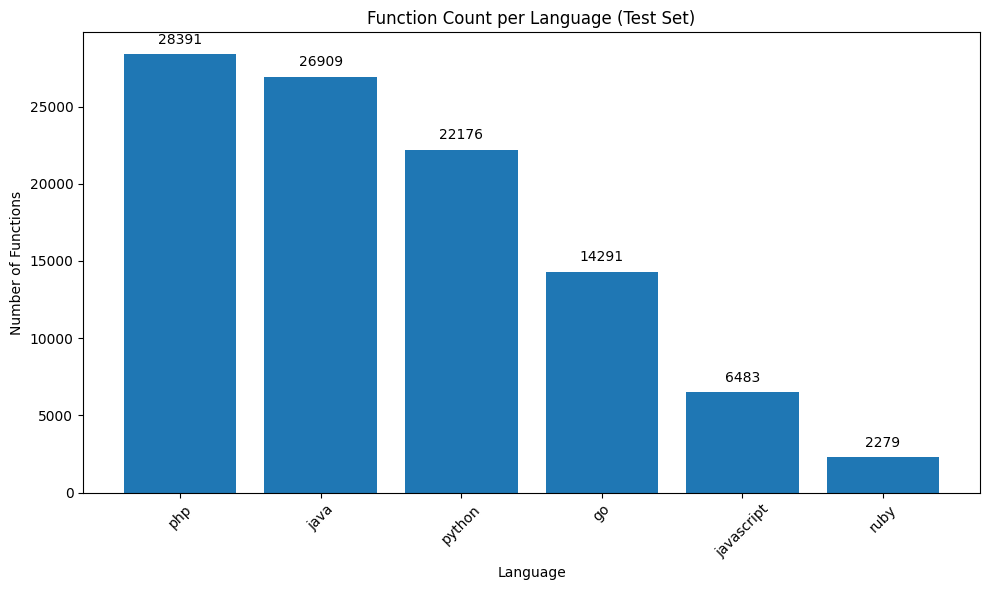

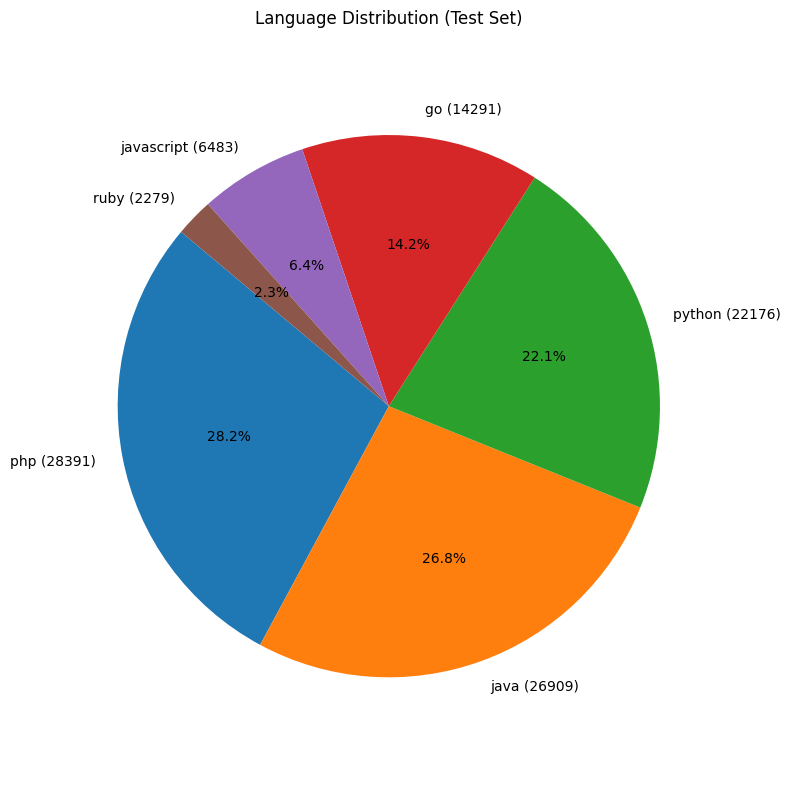

In [28]:
import matplotlib.pyplot as plt

# Count per language
lang_counts = df['language'].value_counts()
langs = lang_counts.index.tolist()
counts = lang_counts.values.tolist()

# Bar chart with counts
plt.figure(figsize=(10, 6))
bars = plt.bar(langs, counts)
plt.title("Function Count per Language (Test Set)")
plt.xlabel("Language")
plt.ylabel("Number of Functions")

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 500, f'{height}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Pie chart with counts included in labels
plt.figure(figsize=(8, 8))
labels = [f'{l} ({c})' for l, c in zip(langs, counts)]
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Language Distribution (Test Set)")
plt.axis('equal')
plt.tight_layout()
plt.show()


Function Length (Lines - whole function):
 count    100529.000000
mean         20.976096
std          36.948626
min           3.000000
25%           8.000000
50%          13.000000
75%          24.000000
max        6512.000000
Name: line_count, dtype: float64

Function Length (Characters - whole function):
 count    100529.000000
mean        747.383949
std        1624.034045
min          54.000000
25%         242.000000
50%         425.000000
75%         820.000000
max      334374.000000
Name: char_count, dtype: float64

Function Length (Tokens - from body only):
 count    100529.000000
mean        118.515961
std         201.121894
min          15.000000
25%          46.000000
50%          73.000000
75%         132.000000
max       32552.000000
Name: token_count, dtype: float64


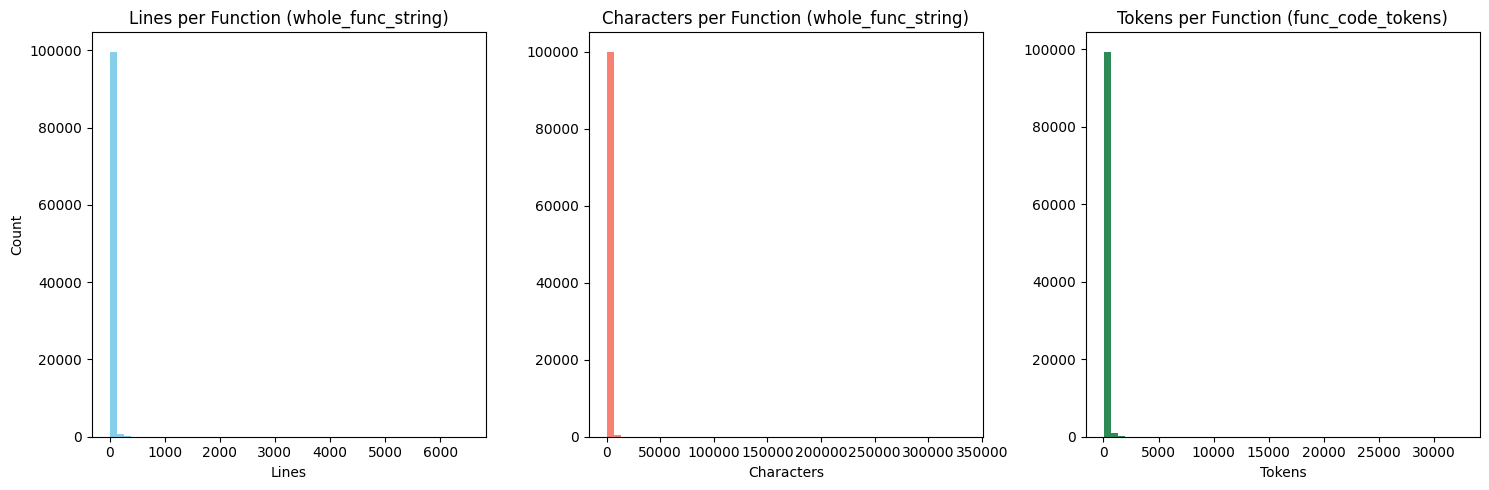

In [29]:
# Compute stats using whole_func_string (not func_code_string)
df['line_count'] = df['whole_func_string'].apply(lambda x: len(x.split('\n')))
df['char_count'] = df['whole_func_string'].apply(len)
df['token_count'] = df['func_code_tokens'].apply(len)

# Print summaries
print("Function Length (Lines - whole function):\n", df['line_count'].describe())
print("\nFunction Length (Characters - whole function):\n", df['char_count'].describe())
print("\nFunction Length (Tokens - from body only):\n", df['token_count'].describe())

# Plot histograms
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['line_count'], bins=50, color='skyblue')
plt.title("Lines per Function (whole_func_string)")
plt.xlabel("Lines")
plt.ylabel("Count")

plt.subplot(1, 3, 2)
plt.hist(df['char_count'], bins=50, color='salmon')
plt.title("Characters per Function (whole_func_string)")
plt.xlabel("Characters")

plt.subplot(1, 3, 3)
plt.hist(df['token_count'], bins=50, color='seagreen')
plt.title("Tokens per Function (func_code_tokens)")
plt.xlabel("Tokens")

plt.tight_layout()
plt.show()


In [30]:
import pandas as pd
import random

# Detect all unique languages in the test set
languages = sorted(df["language"].dropna().unique().tolist())
print(f"Languages found in test set: {languages}")

Languages found in test set: ['go', 'java', 'javascript', 'php', 'python', 'ruby']


In [31]:
samples_per_bucket = 17  # 3 buckets → 51 total per language
final_samples = []

for lang in languages:
    print(f"\nProcessing language: {lang}")

    # Filter data for current language
    df_lang = df[df["language"] == lang].copy()

    # Filter out rows with empty or whitespace-only functions
    df_lang = df_lang[df_lang["whole_func_string"].str.strip().astype(bool)]

    # Add word length column (can also use line/char count instead)
    df_lang["word_len"] = df_lang["whole_func_string"].apply(lambda x: len(x.split()))

    if len(df_lang) < 100:
        print(f"Skipped {lang}: not enough valid samples (only {len(df_lang)} after filtering).")
        continue

    # Sort and split into buckets
    sorted_df = df_lang.sort_values("word_len").reset_index()
    n = len(sorted_df)

    short_df = sorted_df.iloc[:n // 3]
    medium_df = sorted_df.iloc[n // 3: 2 * n // 3]
    long_df = sorted_df.iloc[2 * n // 3:]

    try:
        short_sample = short_df.sample(n=samples_per_bucket, random_state=42).copy()
        medium_sample = medium_df.sample(n=samples_per_bucket, random_state=42).copy()
        long_sample = long_df.sample(n=51 - 2 * samples_per_bucket, random_state=42).copy()
    except ValueError as e:
        print(f"Skipped {lang}: sampling error - {e}")
        continue

    short_sample["length_bucket"] = "short"
    medium_sample["length_bucket"] = "medium"
    long_sample["length_bucket"] = "long"

    language_sample = pd.concat([short_sample, medium_sample, long_sample])
    final_samples.append(language_sample)

# Combine all samples
if final_samples:
    df_sampled = pd.concat(final_samples).reset_index()
    print(f"\nTotal samples collected: {len(df_sampled)}")
    print("Samples per language:")
    print(df_sampled["language"].value_counts())
else:
    print("No samples were collected. Check filtering or data availability.")

# Save to file (JSON Lines format for downstream processing)
df_sampled.to_json("stratified_code_samples_test.jsonl", orient="records", lines=True)



Processing language: go

Processing language: java

Processing language: javascript

Processing language: php

Processing language: python

Processing language: ruby

Total samples collected: 306
Samples per language:
language
go            51
java          51
javascript    51
php           51
python        51
ruby          51
Name: count, dtype: int64


In [32]:
df_sampled.to_json("sampled_code_snippets.json", orient="records", indent=2)


In [33]:
!pip install -U transformers accelerate


In [34]:
from huggingface_hub import notebook_login
notebook_login()

In [40]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

# Step 1: Load model and tokenizer (Gemma or any other)
def load_model(model_id="google/gemma-2-9b-it"):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    dtype = torch.bfloat16 if device == "cuda" else torch.float32

    tokenizer = AutoTokenizer.from_pretrained(model_id)
    model = AutoModelForCausalLM.from_pretrained(
        model_id,
        device_map="auto",
        torch_dtype=dtype
    ).to(device)

    return model, tokenizer, device


In [41]:
def generate_summary(code, model, tokenizer, device, language_name="English", max_new_tokens=500, temperature=0.1):

    user_prompt = (
        f"Please generate a code summary for the given code snippet in {language_name}. "
        "Include the following information: the function's name, a brief description of its purpose, "
        "a list of its arguments and their types, and a summary of its key logic — all in plain, natural text without formatting or section headings.\n\n"
        f"\n\nThe code is:\n\n{code}\n\n"
        )


    messages = [{"role": "user", "content": user_prompt}]
    model_input = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)

    inputs = tokenizer.encode(model_input, add_special_tokens=False, return_tensors="pt").to(device)

    outputs = model.generate(
        input_ids=inputs,
        max_new_tokens=max_new_tokens,
        temperature=temperature,
        do_sample=True,
        top_p=0.1
    )
    output_text = tokenizer.decode(outputs[0], skip_special_tokens=False)

    if "<start_of_turn>model" in output_text:
        clean_summary = output_text.split("<start_of_turn>model")[-1].split("<end_of_turn>")[0].strip()
    else:
        clean_summary = output_text.strip()

    return clean_summary


In [42]:
target_natural_languages = ["English", "Chinese", "French", "Spanish", "Portuguese", "Arabic", "Hindi"]


In [43]:
import json
from tqdm import tqdm

def summarize_and_save_per_language(df_sampled, model, tokenizer, device, model_name="gemma-2-9b-it"):
    all_results = []

    for prog_lang in df_sampled['language'].unique():
        df_lang = df_sampled[df_sampled['language'] == prog_lang]
        results = []

        print(f"\nGenerating summaries for: {prog_lang}")

        for row in tqdm(df_lang.itertuples(index=False), total=len(df_lang), leave=False):
            entry = {
                "id": f"sample_{row.index}",
                "language": prog_lang,
                "length_bucket": getattr(row, "length_bucket", "unknown"),  # <-- Added this line
                "code": row.whole_func_string,
                "docstring": getattr(row, "func_documentation_string", ""),
                "model_name": model_name
            }

            for lang in target_natural_languages:
                summary = generate_summary(row.whole_func_string, model, tokenizer, device, language_name=lang)
                entry[f"summary_{lang.lower()}"] = summary

            results.append(entry)
            all_results.append(entry)

        filename = f"{prog_lang.lower()}_summary_all_languages_{model_name.replace('/', '-')}.json"
        with open(filename, "w", encoding="utf-8") as f:
            json.dump(results, f, ensure_ascii=False, indent=2)

        print(f"Saved per-language file: {filename}")

    # Save the combined big file
    big_filename = f"all_languages_combined_{model_name.replace('/', '-')}.json"
    with open(big_filename, "w", encoding="utf-8") as f:
        json.dump(all_results, f, ensure_ascii=False, indent=2)

    print(f"\nSaved big combined file: {big_filename}")


In [44]:
model, tokenizer, device = load_model("google/gemma-2-9b-it")

summarize_and_save_per_language(
    df_sampled=df_sampled,
    model=model,
    tokenizer=tokenizer,
    device=device,
    model_name="gemma-2-9b-it"
)

tokenizer_config.json:   0%|          | 0.00/47.0k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/857 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/39.1k [00:00<?, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.90G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/3.67G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/173 [00:00<?, ?B/s]


Generating summaries for: go


Saved per-language file: go_summary_all_languages_gemma-2-9b-it.json

Generating summaries for: java


Saved per-language file: java_summary_all_languages_gemma-2-9b-it.json

Generating summaries for: javascript


Saved per-language file: javascript_summary_all_languages_gemma-2-9b-it.json

Generating summaries for: php


Saved per-language file: php_summary_all_languages_gemma-2-9b-it.json

Generating summaries for: python


Saved per-language file: python_summary_all_languages_gemma-2-9b-it.json

Generating summaries for: ruby


Saved per-language file: ruby_summary_all_languages_gemma-2-9b-it.json

Saved big combined file: all_languages_combined_gemma-2-9b-it.json
